In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('diabetes_data.csv')
data.head()

,Unnamed: 0,DIABETE4,SEXVAR,INCOME3,_RFHLTH,_RFDRHV8,_AGE80,SMOKE100,_METSTAT,_PRACE2,MENTHLTH
0,342,1.0,2.0,9.0,1.0,1.0,68.0,1.0,2.0,1.0,88.0
1,343,0.0,1.0,7.0,1.0,1.0,71.0,1.0,1.0,1.0,88.0
2,344,1.0,1.0,7.0,2.0,1.0,72.0,1.0,1.0,1.0,88.0
3,345,1.0,1.0,7.0,1.0,1.0,78.0,1.0,1.0,1.0,88.0
4,346,1.0,2.0,4.0,2.0,1.0,80.0,2.0,1.0,1.0,88.0


In [19]:
data.loc[data['_PRACE2'] == 1.0, '_PRACE2'] = 0.0
data.loc[data['_PRACE2'] == 2.0, '_PRACE2'] = 1.0
data = data[data._PRACE2 <= 1.0]

In [20]:
data = data.groupby(['_PRACE2'], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=2023))

In [21]:
from imblearn.under_sampling import RandomUnderSampler
cvd_distribution = data['DIABETE4'].value_counts()
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X= data.drop('DIABETE4', axis=1)
y = data['DIABETE4']
X_resampled, y_resampled = undersample.fit_resample(X, y)
data = pd.concat([pd.DataFrame(X_resampled, columns = X.columns), pd.DataFrame(y_resampled, columns=['DIABETE4'])], axis=1)

In [22]:
data['DIABETE4'].value_counts()

0.0    2130
1.0    2130
Name: DIABETE4, dtype: int64

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['DIABETE4'])
y = data.DIABETE4

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

train = X_train.copy()
train['DIABETE4'] = y_train
test = X_test.copy()
test['DIABETE4'] = y_test

(3408, 10) (852, 10) (3408,) (852,)


In [25]:
train.head()

,Unnamed: 0,SEXVAR,INCOME3,_RFHLTH,_RFDRHV8,_AGE80,SMOKE100,_METSTAT,_PRACE2,MENTHLTH,DIABETE4
298389,0.872987,1.0,0.061224,0.000,0.0,0.983871,1.0,0.0,0.0,0.887755,0.0
235477,0.690123,1.0,0.000000,0.125,0.0,0.435484,0.0,1.0,0.0,0.244898,1.0
157196,0.462722,1.0,0.071429,0.000,0.0,0.612903,0.0,0.0,0.0,0.020408,1.0
228692,0.670365,0.0,0.071429,0.000,0.0,0.516129,1.0,1.0,0.0,0.887755,1.0
300933,0.880367,0.0,0.040816,0.000,0.0,0.500000,0.0,0.0,1.0,0.887755,0.0


In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))
print(logreg.score(X_train, y_train))

0.67018779342723
0.6728286384976526


In [27]:
y_train

298389    0.0
235477    1.0
157196    1.0
228692    1.0
300933    0.0
         ... 
313624    0.0
49706     1.0
330725    1.0
169983    1.0
98324     1.0
Name: DIABETE4, Length: 3408, dtype: float64

In [28]:
logreg.predict_proba(X_train)

array([[0.58437679, 0.41562321],
       [0.43707565, 0.56292435],
       [0.3745469 , 0.6254531 ],
       ...,
       [0.99852667, 0.00147333],
       [0.27913045, 0.72086955],
       [0.28337311, 0.71662689]])

In [29]:
train_male = train.loc[train['_PRACE2'] == 0.0]
train_female = train.loc[train['_PRACE2'] == 1.0]
X_train_male = train_male.copy().drop('DIABETE4', axis=1)
X_train_female = train_female.copy().drop('DIABETE4', axis=1)
y_train_male = train_male['DIABETE4']
y_train_female = train_female['DIABETE4']

test_male = test.loc[test['_PRACE2'] == 0.0]
test_female = test.loc[test['_PRACE2'] == 1.0]
X_test_male = test_male.copy().drop('DIABETE4', axis=1)
X_test_female = test_female.copy().drop('DIABETE4', axis=1)
y_test_male = test_male['DIABETE4']
y_test_female = test_female['DIABETE4']

In [30]:
train_male.head(30)

,Unnamed: 0,SEXVAR,INCOME3,_RFHLTH,_RFDRHV8,_AGE80,SMOKE100,_METSTAT,_PRACE2,MENTHLTH,DIABETE4
298389,0.872987,1.0,0.061224,0.000,0.0,0.983871,1.0,0.0,0.0,0.887755,0.0
235477,0.690123,1.0,0.000000,0.125,0.0,0.435484,0.0,1.0,0.0,0.244898,1.0
157196,0.462722,1.0,0.071429,0.000,0.0,0.612903,0.0,0.0,0.0,0.020408,1.0
228692,0.670365,0.0,0.071429,0.000,0.0,0.516129,1.0,1.0,0.0,0.887755,1.0
87499,0.261619,1.0,1.000000,0.000,0.0,0.548387,0.0,0.0,0.0,0.887755,1.0
25196,0.077023,1.0,0.051020,0.000,0.0,0.709677,1.0,0.0,0.0,0.887755,0.0
233326,0.683984,1.0,0.051020,0.125,0.0,0.887097,1.0,1.0,0.0,0.887755,0.0
143009,0.420901,0.0,1.000000,0.000,0.0,0.838710,0.0,0.0,0.0,0.887755,1.0
277211,0.810537,0.0,0.071429,0.125,0.0,0.387097,1.0,0.0,0.0,0.887755,0.0
1630,0.006594,1.0,0.051020,0.000,0.0,0.774194,1.0,1.0,0.0,0.887755,0.0


In [31]:
import pickle
from scipy.linalg import norm
import numpy as np
import math
def generate_matrices (model, l=0.0000000000001):
    X_train_male_proba = model.predict_proba(X_train_male)
    X_train_female_proba = model.predict_proba(X_train_female)
    X_test_male_proba = model.predict_proba(X_test_male)
    X_test_female_proba = model.predict_proba(X_test_female)

    X_train_male_prediction = model.predict(X_train_male)
    X_train_female_prediction = model.predict(X_train_female)
    X_test_male_prediction = model.predict(X_test_male)
    X_test_female_prediction = model.predict(X_test_female)

    try:
        print("1")
        matrix_male_to_all = pickle.load(open('diabetes/race/matrix_male_to_all.pkl', 'rb'))
        matrix_female_to_all = pickle.load(open('diabetes/race/matrix_female_to_all.pkl', 'rb'))
        try:
            print ("1")
            matrix_all = pickle.load(open('diabetes/race/matrix_all.pkl', 'rb'))
        except FileNotFoundError as e:
            print ("2")
            matrix_all = np.concatenate((np.array(matrix_male_to_all)[:, len(X_train_female):], np.array(matrix_male_to_all)[:, :len(X_train_female)]), axis=1).tolist() + matrix_female_to_all
            pickle.dump(matrix_all, open('diabetes/race/matrix_all.pkl', 'wb'))
    except FileNotFoundError as e:
        print("2")
        matrix_male_to_all = [[0 for i in range(len(X_train_female_prediction) + len(X_train_male_prediction))] for j in range(len(X_train_male_prediction))]
        matrix_female_to_all = [[0 for i in range(len(X_train_male_prediction) + len(X_train_female_prediction))] for j in range(len(X_train_female_prediction))]

        for i in range (len(X_train_male_prediction)):
            for j in range (len(X_train_female_prediction)):
                matrix_male_to_all[i][j] = norm(X_train_male_proba[i] - X_train_female_proba[j], 2)
            for j in range (len(X_train_male_prediction)):
                matrix_male_to_all[i][j + len(X_train_female_prediction)] = norm(X_train_male_proba[i] - X_train_male_proba[j], 2)

        for i in range (len(X_train_female_prediction)):
            for j in range (len(X_train_male_prediction)):
                matrix_female_to_all[i][j] = norm(X_train_female_proba[i] - X_train_male_proba[j], 2)
            for j in range (len(X_train_female_prediction)):
                matrix_female_to_all[i][j + len(X_train_male_prediction)] = norm(X_train_female_proba[i] - X_train_female_proba[j], 2)

        matrix_all = np.concatenate((np.array(matrix_male_to_all)[:, len(X_train_female):], np.array(matrix_male_to_all)[:, :len(X_train_female)]), axis=1).tolist() + matrix_female_to_all

        pickle.dump(matrix_male_to_all, open('diabetes/race/matrix_male_to_all.pkl', 'wb'))
        pickle.dump(matrix_female_to_all, open('diabetes/race/matrix_female_to_all.pkl', 'wb'))
        pickle.dump(matrix_all, open('diabetes/race/matrix_all.pkl', 'wb'))

    try:
        print("1")
        matrix_male_to_all_accurate = pickle.load(open('diabetes/race/matrix_male_to_all_accurate.pkl', 'rb'))
        matrix_female_to_all_accurate = pickle.load(open('diabetes/race/matrix_female_to_all_accurate.pkl', 'rb'))
        for i in range (len(X_train_male_prediction)):
            for j in range (len(X_train_female_prediction) + len(X_train_male_prediction)):
                matrix_male_to_all_accurate[i][j] = matrix_male_to_all[i][j] + matrix_male_to_all_accurate[i][j] * l
        for i in range (len(X_train_female_prediction)):
            for j in range (len(X_train_male_prediction) + len(X_train_female_prediction)):
                matrix_female_to_all_accurate[i][j] = matrix_female_to_all[i][j] + matrix_female_to_all_accurate[i][j] * l
    except FileNotFoundError as e:
        print("2")
        matrix_male_to_all_accurate = [[0 for i in range(len(X_train_female_prediction) + len(X_train_male_prediction))] for j in range(len(X_train_male_prediction))]
        matrix_female_to_all_accurate = [[0 for i in range(len(X_train_male_prediction) + len(X_train_female_prediction))] for j in range(len(X_train_female_prediction))]

        for i in range (len(X_train_male_prediction)):
            for j in range (len(X_train_female_prediction)):#old: norm(X_train_male_proba[i] - X_train_female_proba[j], 2) - math.log(X_train_female_proba[j][int(y_train_male.iloc[i])]) * l
                                                #- math.log(X_train_female_proba[j][int(y_train_male.iloc[i])]), so that we won't have to recalculate with a different l
                matrix_male_to_all_accurate[i][j] =  - math.log(X_train_female_proba[j][int(y_train_male.iloc[i])])
            for j in range (len(X_train_male_prediction)): #norm(X_train_male_proba[i] - X_train_male_proba[j], 2)
                matrix_male_to_all_accurate[i][j + len(X_train_female_prediction)] =  -math.log(X_train_male_proba[j][int(y_train_male.iloc[i])])

        for i in range (len(X_train_female_prediction)):
            for j in range (len(X_train_male_prediction)): #norm(X_train_female_proba[i] - X_train_male_proba[j], 2)
                matrix_female_to_all_accurate[i][j] =  -math.log(X_train_male_proba[j][int(y_train_female.iloc[i])])
            for j in range (len(X_train_female_prediction)): #norm(X_train_female_proba[i] - X_train_female_proba[j], 2)
                matrix_female_to_all_accurate[i][j + len(X_train_male_prediction)] = -math.log(X_train_female_proba[j][int(y_train_female.iloc[i])])

        pickle.dump(matrix_male_to_all_accurate, open('diabetes/race/matrix_male_to_all_accurate.pkl', 'wb'))
        pickle.dump(matrix_female_to_all_accurate, open('diabetes/race/matrix_female_to_all_accurate.pkl', 'wb'))

        for i in range (len(X_train_male_prediction)):
            for j in range (len(X_train_female_prediction) + len(X_train_male_prediction)):
                matrix_male_to_all_accurate[i][j] = matrix_male_to_all[i][j] + matrix_male_to_all_accurate[i][j] * l
        for i in range (len(X_train_female_prediction)):
            for j in range (len(X_train_male_prediction) + len(X_train_female_prediction)):
                matrix_female_to_all_accurate[i][j] = matrix_female_to_all[i][j] + matrix_female_to_all_accurate[i][j] * l

    try:
        print("1")
        matrix = pickle.load(open('diabetes/race/matrix-norm-1.pkl', 'rb'))
        matrix2 = pickle.load(open('diabetes/race/matrix-norm-2.pkl', 'rb'))
    except FileNotFoundError as e:
        print("2")
        matrix = [[0 for i in range(len(X_train_female_prediction))] for j in range(len(X_train_male_prediction))]
        matrix2 = [[0 for i in range(len(X_train_female_prediction))] for j in range(len(X_train_male_prediction))]

        for i in range (len(X_train_male_prediction)):
            for j in range (len(X_train_female_prediction)):

                matrix[i][j] = norm(X_train_male_proba[i] - X_train_female_proba[j], 1)
                matrix2[i][j] = norm(X_train_male_proba[i] - X_train_female_proba[j], 2)

        pickle.dump(matrix, open('diabetes/race/matrix-norm-1.pkl', 'wb'))
        pickle.dump(matrix2, open('diabetes/race/matrix-norm-2.pkl', 'wb'))
    return matrix_male_to_all, matrix_female_to_all, matrix_all, matrix_male_to_all_accurate, matrix_female_to_all_accurate, matrix, matrix2

In [32]:
matrix_male_to_all, matrix_female_to_all, matrix_all, matrix_male_to_all_accurate, matrix_female_to_all_accurate, matrix, matrix2 = generate_matrices(logreg)

1
2
1
2
1
2


In [33]:
X_train_male_proba = logreg.predict_proba(X_train_male)
X_train_female_proba = logreg.predict_proba(X_train_female)
X_test_male_proba = logreg.predict_proba(X_test_male)
X_test_female_proba = logreg.predict_proba(X_test_female)

In [34]:
import ot


def generate_T_matrices_union():
    alpha_list = np.linspace(0, 1, 11)
    ind = 0
    T_male_to_all = [None] * 11
    T_female_to_all = [None] * 11
    T_male_to_all_accurate = [None] * 11
    T_female_to_all_accurate = [None] * 11
    for alpha in alpha_list:
        alpha = round(alpha, 1)
        try:
            print("Loading Saved Matrices")
            T_male_to_all[ind] = pickle.load(
                open(
                    "diabetes/race/T_male_to_all_"
                    + str(alpha)
                    + ".pkl",
                    "rb",
                )
            )
            T_female_to_all[ind] = pickle.load(
                open(
                    "diabetes/race/T_female_to_all_"
                    + str(alpha)
                    + ".pkl",
                    "rb",
                )
            )
        except OSError as e:
            print("OSError Exception")
            a = [1 / len(train_male)] * len(train_male)
            b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(
                train_female
            ) + [
                (alpha / len(train_male))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(
                train_male
            )
            T_male_to_all[ind] = ot.emd(a, b, matrix_male_to_all)

            a = [1 / len(train_female)] * len(train_female)
            b = [(1 - alpha) / (len(train_female) + len(train_male))] * len(
                train_male
            ) + [
                (alpha / len(train_female))
                + (1 - alpha) / (len(train_female) + len(train_male))
            ] * len(
                train_female
            )
            T_female_to_all[ind] = ot.emd(a, b, matrix_female_to_all)

            pickle.dump(
                T_male_to_all[ind],
                open(
                    "diabetes/race/T_male_to_all_"
                    + str(alpha)
                    + ".pkl",
                    "wb",
                ),
            )
            pickle.dump(
                T_female_to_all[ind],
                open(
                    "diabetes/race/T_female_to_all_"
                    + str(alpha)
                    + ".pkl",
                    "wb",
                ),
            )

        try:
            print("Loading Saved Matrices")
            T_male_to_all_accurate[ind] = pickle.load(
                open(
                    "diabetes/race/T_male_to_all_accurate_"
                    + str(alpha)
                    + ".pkl",
                    "rb",
                )
            )
            T_female_to_all_accurate[ind] = pickle.load(
                open(
                    "diabetes/race/T_female_to_all_accurate_"
                    + str(alpha)
                    + ".pkl",
                    "rb",
                )
            )
        except OSError as e:
            print("OSError Exception")
            a = [1 / len(train_male)] * len(train_male)
            # new a but swap male and female
            b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(
                train_female
            ) + [
                (alpha / len(train_male))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(
                train_male
            )
            T_male_to_all_accurate[ind] = ot.emd(a, b, matrix_male_to_all_accurate)

            a = [1 / len(train_female)] * len(train_female)
            # stays the same as b
            b = [(1 - alpha) / (len(train_female) + len(train_male))] * len(
                train_male
            ) + [
                (alpha / len(train_female))
                + (1 - alpha) / (len(train_female) + len(train_male))
            ] * len(
                train_female
            )
            T_female_to_all_accurate[ind] = ot.emd(a, b, matrix_female_to_all_accurate)

            pickle.dump(
                T_male_to_all_accurate[ind],
                open(
                    "diabetes/race/T_male_to_all_accurate_"
                    + str(alpha)
                    + ".pkl",
                    "wb",
                ),
            )
            pickle.dump(
                T_female_to_all_accurate[ind],
                open(
                    "diabetes/race/T_female_to_all_accurate_"
                    + str(alpha)
                    + ".pkl",
                    "wb",
                ),
            )

        ind += 1
    a = [1 / len(train_male)] * len(train_male)
    b = [1 / len(train_female)] * len(train_female)
    T = ot.emd(a, b, matrix2)
    return (
        T_male_to_all,
        T_female_to_all,
        T_male_to_all_accurate,
        T_female_to_all_accurate,
        T,
    )


In [35]:
T_male_to_all, T_female_to_all, T_male_to_all_accurate, T_female_to_all_accurate, T = generate_T_matrices_union()

Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception
Loading Saved Matrices
OSError Exception


In [36]:
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.manifold import TSNE

train_male_proba = logreg.predict_proba(X_train_male)
train_female_proba = logreg.predict_proba(X_train_female)

train_female_proba_new = np.empty((len(train_female), 2))
train_male_proba_new = np.empty((len(train_male), 2))

def reduce_bias_new(model, alpha_samples, union=False, accurateMatrix=False):
    index = 0
    alpha_list = [i for i in range(11)] if union else np.linspace(0, 1, alpha_samples)
    female_accuracy_list = []
    female_unfairness_list = []
    male_accuracy_list = []
    male_unfairness_list = []
    accuracy_list = []
    unfairness_list = []
    wasserstein_list = []
    print(
        "Baseline Accuracy: "
        + str(
            accuracy_score(
                np.concatenate((y_train_female, y_train_male)),
                np.concatenate(
                    (logreg.predict(X_train_female), logreg.predict(X_train_male))
                ),
            )
        )
    )

    X_train_male_prediction = model.predict(X_train_male)
    X_train_female_prediction = model.predict(X_train_female)

    X_train_male_distribution = list(
        np.unique(X_train_male_prediction, return_counts=True)
    )[1] / len(X_train_male_prediction)
    X_train_female_distribution = list(
        np.unique(X_train_female_prediction, return_counts=True)
    )[1] / len(X_train_female_prediction)

    train_difference = 0
    for i in range(2):
        train_difference += abs(
            X_train_male_distribution[i] - X_train_female_distribution[i]
        )
    print("Baseline Unfairness: " + str(train_difference))

    alpha = 1
    a = [
        (alpha) / (len(train_male))
        + (1 - alpha) / (len(train_male) + len(train_female))
    ] * len(train_male) + [((1 - alpha) / (len(train_male) + len(train_female)))] * len(
        train_female
    )
    b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(train_male) + [
        (alpha / len(train_female))
        + (1 - alpha) / (len(train_male) + len(train_female))
    ] * len(train_female)
    print("Baseline Wasserstein Distance: " + str(ot.emd2(a, b, matrix_all)))

    if not union:
        for alpha in alpha_list:
            print("Alpha = " + str(alpha))
            # correcting Female proba
            train_female_proba_new = np.empty((len(train_female), 2))
            train_male_proba_new = np.empty((len(train_male), 2))

            T = globals()["T"]
            for i in range(len(T.transpose())):
                index = 0
                train_female_proba_temp = 0
                index = np.random.choice(
                    np.array(np.nonzero(T.transpose()[i]))[0],
                    1,
                    p=T.transpose()[i][np.nonzero(T.transpose()[i])]
                    * len(train_female),
                )
                train_female_proba_temp = train_male_proba[index]

                # higher alpha should mean higher accuracy, lower means more fair
                train_female_proba_new[i] = (1 - alpha) * (
                    train_female_proba_temp
                ) + alpha * (train_female_proba[i])

            index = 0
            y_pred_female = np.empty((len(y_train_female)))
            for proba in train_female_proba_new:
                y_pred_female[index] = np.argmax(proba)
                index += 1

            X_train_male_prediction = model.predict(X_train_male)

            X_train_male_distribution = list(
                np.unique(X_train_male_prediction, return_counts=True)
            )[1] / len(X_train_male_prediction)
            X_train_female_distribution = list(
                np.unique(y_pred_female, return_counts=True)
            )[1] / len(y_pred_female)
            train_difference = 0
            for i in range(2):
                train_difference += abs(
                    X_train_male_distribution[i] - X_train_female_distribution[i]
                )
            accuracy = accuracy_score(
                np.concatenate((y_train_female, y_train_male)),
                np.concatenate((y_pred_female, model.predict(X_train_male))),
            )
            unfairness = train_difference

            # a = [(alpha) / (len(train_male)) + (1 - alpha) / (len(train_male) + len(train_female))] * len(train_male) + [((1 - alpha) /  (len(train_male) + len(train_female))) ] * len(train_female)
            # b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(train_male) + [(alpha / len(train_female)) + (1 - alpha) / (len(train_male) + len(train_female))] * len(train_female)
            # print (sum(a))
            # print (sum(b))
            # wasserstein_distance = ot.emd2(a, b, matrix_all)
            # a =###
            # b = ###
            # wasserstein_distance = ot.emd2(###) #####
            # lower distance is more fair, when alpha=0, wasserstein distance should be 0, wasserstein vs accuracy graph
            female_accuracy_list.append(accuracy)
            female_unfairness_list.append(unfairness)
            # wasserstein_list.append(wasserstein_distance)
            print("Corrected Accuracy: " + str(accuracy))
            print("Corrected Unfairness: " + str(train_difference))
            # print ("Corrected Wasserstein Distance: " + str(wasserstein_distance))

            if alpha == alpha_list[0]:
                fairest_train_female_proba_new = train_female_proba_new.copy()

            # correcting Male proba
            for i in range(len(T)):
                index = np.random.choice(
                    np.array(np.nonzero(T[i]))[0],
                    1,
                    p=T[i][np.nonzero(T[i])] * len(train_male),
                )
                train_male_proba_temp = train_female_proba[index]

                # higher alpha should mean higher accuracy, lower means more fair
                train_male_proba_new[i] = (1 - alpha) * (
                    train_male_proba_temp
                ) + alpha * (train_male_proba[i])

            index = 0
            y_pred_male = np.empty((len(y_train_male)))
            for proba in train_male_proba_new:
                y_pred_male[index] = np.argmax(proba)
                index += 1

            X_train_female_prediction = model.predict(X_train_female)

            X_train_male_distribution = list(
                np.unique(y_pred_male, return_counts=True)
            )[1] / len(y_pred_male)
            X_train_female_distribution = list(
                np.unique(X_train_female_prediction, return_counts=True)
            )[1] / len(X_train_female_prediction)
            train_difference = 0
            for i in range(2):
                train_difference += abs(
                    X_train_male_distribution[i] - X_train_female_distribution[i]
                )
            accuracy = accuracy_score(
                np.concatenate((y_train_female, y_train_male)),
                np.concatenate((model.predict(X_train_female), y_pred_male)),
            )
            unfairness = train_difference
            male_accuracy_list.append(accuracy)
            male_unfairness_list.append(unfairness)
            print("Corrected Accuracy: " + str(accuracy))
            print("Corrected Unfairness: " + str(train_difference))

            if alpha == alpha_list[0]:
                fairest_train_male_proba_new = train_male_proba_new.copy()
        return (
            female_accuracy_list,
            female_unfairness_list,
            male_accuracy_list,
            male_unfairness_list,
            train_female_proba_new,
            train_male_proba_new,
            fairest_train_female_proba_new,
            fairest_train_male_proba_new,
        )
    else:
        for alpha in alpha_list:
            # correcting Female proba
            print("alpha = " + str(alpha / 10.0))
            train_female_proba_new = np.empty((len(train_female), 2))
            train_male_proba_new = np.empty((len(train_male), 2))

            if accurateMatrix:
                T = T_female_to_all_accurate[alpha]
            else:
                T = T_female_to_all[alpha]
            for i in range(10):
                print("i = " + str(i), end=" ")
                print(np.array(np.nonzero(T[i])), end="")
                print(T[i][np.nonzero(T[i])] * len(train_female))
            for i in range(len(T)):
                index = np.random.choice(
                    np.array(np.nonzero(T[i]))[0],
                    1,
                    p=T[i][np.nonzero(T[i])] * len(train_female),
                )
                if index < len(train_male):
                    train_female_proba_new[i] = train_male_proba[index]
                else:
                    index -= len(train_male)
                    train_female_proba_new[i] = train_female_proba[index]

            index = 0
            y_pred_female = np.empty((len(y_train_female)))
            for proba in train_female_proba_new:
                y_pred_female[index] = np.argmax(proba)
                index += 1

            # if (alpha == alpha_list[0]): fairest_train_female_proba_new = train_female_proba_new.copy()

            # correcting Male proba
            if accurateMatrix:
                T = T_male_to_all_accurate[alpha]
            else:
                T = T_male_to_all[alpha]
            for i in range(len(T)):
                index = np.random.choice(
                    np.array(np.nonzero(T[i]))[0],
                    1,
                    p=T[i][np.nonzero(T[i])] * len(train_male),
                )
                if index < len(train_female):
                    train_male_proba_new[i] = train_female_proba[index]
                else:
                    index -= len(train_female)
                    train_male_proba_new[i] = train_male_proba[index]

            index = 0
            y_pred_male = np.empty((len(y_train_male)))
            for proba in train_male_proba_new:
                y_pred_male[index] = np.argmax(proba)
                index += 1

            X_train_male_distribution = list(
                np.unique(y_pred_male, return_counts=True)
            )[1] / len(y_pred_male)
            X_train_female_distribution = list(
                np.unique(y_pred_female, return_counts=True)
            )[1] / len(y_pred_female)

            train_difference = 0
            for i in range(2):
                train_difference += abs(
                    X_train_male_distribution[i] - X_train_female_distribution[i]
                )

            accuracy = accuracy_score(
                np.concatenate((y_train_female, y_train_male)),
                np.concatenate((y_pred_female, y_pred_male)),
            )
            unfairness = train_difference
            alpha = alpha / 10
            a = [
                (alpha) / (len(train_male))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(train_male) + [
                ((1 - alpha) / (len(train_male) + len(train_female)))
            ] * len(
                train_female
            )
            b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(
                train_male
            ) + [
                (alpha / len(train_female))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(
                train_female
            )
            wasserstein_distance = ot.emd2(a, b, matrix_all)

            accuracy_list.append(accuracy)
            unfairness_list.append(unfairness)
            wasserstein_list.append(wasserstein_distance)
            print("Corrected Accuracy: " + str(accuracy))
            print("Corrected Unfairness: " + str(train_difference))
            print("Corrected Wasserstein Distance: " + str(wasserstein_distance))

            # if (alpha == alpha_list[0]): fairest_train_male_proba_new = train_male_proba_new.copy()

        return accuracy_list, unfairness_list, wasserstein_list


In [37]:
accuracy_list, unfairness_list, wasserstein_list = reduce_bias_new(logreg, 5, True, False)

Baseline Accuracy: 0.6728286384976526
Baseline Unfairness: 0.3686950642325896
Baseline Wasserstein Distance: 0.13750624551259816
alpha = 0.0
i = 0 [[  64  208  434 1305 1388 1793 2075 2578 2580 2827 2977 3060]][0.10211268 0.10211268 0.02112676 0.02112676 0.10211268 0.10211268
 0.10211268 0.06690141 0.10211268 0.10211268 0.07394366 0.10211268]
i = 1 [[ 152  545  652  746  860  931 1033 1238 1447 1721 2612 2872 3061]][0.10211268 0.10211268 0.10211268 0.10211268 0.04577465 0.10211268
 0.10211268 0.10211268 0.01056338 0.02112676 0.00352113 0.10211268
 0.10211268]
i = 2 [[ 211  250  466  552 1945 1999 2143 2569 2810 2947 3240]][0.10211268 0.10211268 0.07746479 0.00352113 0.10211268 0.10211268
 0.10211268 0.10211268 0.10211268 0.10211268 0.10211268]
i = 3 [[ 288 1145 1620 2455 2507 2663 2682 2808 3045 3063]][0.08098592 0.10211268 0.10211268 0.10211268 0.10211268 0.10211268
 0.10211268 0.10211268 0.10211268 0.10211268]
i = 4 [[  23  226  436  520  930  942 1067 1095 1935 2278 2352 2664]][0.02

Corrected Accuracy: 0.670774647887324
Corrected Unfairness: 0.1275636691458193
Corrected Wasserstein Distance: 0.05500249820503912
alpha = 0.5
i = 0 [[  64  245  456  637  887 1079 1748 2135 2286 2646 2833 3060]][0.05105634 0.05105634 0.05105634 0.05105634 0.05105634 0.00352113
 0.05105634 0.05105634 0.05105634 0.05105634 0.05105634 0.48591549]
i = 1 [[ 580  808  833  872 1009 1123 1249 2707 2952 3061]][0.05105634 0.05105634 0.05105634 0.05105634 0.05105634 0.05105634
 0.04049296 0.05105634 0.05105634 0.55105634]
i = 2 [[ 618  631  698 1185 1692 2001 2005 2086 2385 2559 3018 3062]][0.05105634 0.05105634 0.01056338 0.05105634 0.05105634 0.05105634
 0.05105634 0.05105634 0.05105634 0.00704225 0.02288732 0.55105634]
i = 3 [[1333 1620 2066 2455 2507 2663 2682 2808 3045 3063]][0.05105634 0.05105634 0.05105634 0.05105634 0.04225352 0.05105634
 0.04929577 0.05105634 0.05105634 0.55105634]
i = 4 [[ 676 2024 2039 2743 3064 3251 3262 3268]][0.05105634 0.05105634 0.01232394 0.05105634 0.55105634 

C:\Users\anush\AppData\Local\Programs\Python\Python39\lib\site-packages\ot\lp\__init__.py:571: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  check_result(result_code)


Corrected Accuracy: 0.6722417840375586
Corrected Unfairness: 0.3468785215235519
Corrected Wasserstein Distance: 0.12375562096133855
alpha = 1.0
i = 0 [[3060]][1.]
i = 1 [[3061]][1.]
i = 2 [[3062]][1.]
i = 3 [[3063]][1.]
i = 4 [[3064]][1.]
i = 5 [[3065]][1.]
i = 6 [[3066]][1.]
i = 7 [[3067]][1.]
i = 8 [[3068]][1.]
i = 9 [[3069]][1.]
Corrected Accuracy: 0.6728286384976526
Corrected Unfairness: 0.3686950642325896
Corrected Wasserstein Distance: 0.13750624551259816


In [38]:
accuracy_list_accurate, unfairness_list_accurate, wasserstein_list_accurate = reduce_bias_new(logreg, 5, True, True)

Baseline Accuracy: 0.6728286384976526
Baseline Unfairness: 0.3686950642325896
Baseline Wasserstein Distance: 0.13750624551259816
alpha = 0.0
i = 0 [[  64  206  245  785 1852 2074 2692 2826 2975 3094]][0.10211268 0.10211268 0.10211268 0.10211268 0.10211268 0.10211268
 0.08098592 0.10211268 0.10211268 0.10211268]
i = 1 [[ 514  663 1321 1386 1714 1912 2201 2261 2305 2548 3061]][0.02112676 0.10211268 0.10211268 0.10211268 0.10211268 0.10211268
 0.10211268 0.10211268 0.05985915 0.10211268 0.10211268]
i = 2 [[ 691  846 1185 1453 1574 1796 1965 2505 2870 3008 3062]][0.10211268 0.05985915 0.10211268 0.10211268 0.10211268 0.02112676
 0.10211268 0.10211268 0.10211268 0.10211268 0.10211268]
i = 3 [[ 288 1620 1633 2455 2507 2663 2682 2808 3045 3063]][0.08098592 0.10211268 0.10211268 0.10211268 0.10211268 0.10211268
 0.10211268 0.10211268 0.10211268 0.10211268]
i = 4 [[ 343  578  631  766  787  803 1246 1250 1325 1579 1829]][0.10211268 0.10211268 0.10211268 0.10211268 0.10211268 0.02112676
 0.10211

Corrected Accuracy: 0.6669600938967136
Corrected Unfairness: 0.11018706333107953
Corrected Wasserstein Distance: 0.05500249820503912
alpha = 0.5
i = 0 [[  64  647  750 1203 1224 1471 2479 2554 2975 3060]][0.05105634 0.04049296 0.05105634 0.05105634 0.05105634 0.05105634
 0.05105634 0.05105634 0.05105634 0.55105634]
i = 1 [[  32  230  762  833 1457 1873 2029 3061 3129]][0.05105634 0.00704225 0.05105634 0.05105634 0.05105634 0.05105634
 0.05105634 0.13556338 0.55105634]
i = 2 [[ 110  195  575  691  960 1498 2457 2505 3062 3280 3319]][0.05105634 0.05105634 0.05105634 0.05105634 0.05105634 0.01056338
 0.05105634 0.05105634 0.55105634 0.06161972 0.0193662 ]
i = 3 [[ 389 1620 1921 2455 2507 2663 2682 2808 3045 3063]][0.05105634 0.05105634 0.05105634 0.04753521 0.04401408 0.05105634
 0.05105634 0.05105634 0.05105634 0.55105634]
i = 4 [[ 445  715 1265 1325 2092 2464 2743 3064 3262 3385]][0.05105634 0.05105634 0.05105634 0.05105634 0.05105634 0.05105634
 0.05105634 0.55105634 0.08098592 0.01056

C:\Users\anush\AppData\Local\Programs\Python\Python39\lib\site-packages\ot\lp\__init__.py:571: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  check_result(result_code)


Corrected Accuracy: 0.6737089201877934
Corrected Unfairness: 0.3232364210051837
Corrected Wasserstein Distance: 0.12375562096133855
alpha = 1.0
i = 0 [[3060]][1.]
i = 1 [[3061]][1.]
i = 2 [[3062]][1.]
i = 3 [[3063]][1.]
i = 4 [[3064]][1.]
i = 5 [[3065]][1.]
i = 6 [[3066]][1.]
i = 7 [[3067]][1.]
i = 8 [[3068]][1.]
i = 9 [[3069]][1.]
Corrected Accuracy: 0.6728286384976526
Corrected Unfairness: 0.3686950642325896
Corrected Wasserstein Distance: 0.13750624551259816


In [39]:
female_accuracy_list, female_unfairness_list, male_accuracy_list, male_unfairness_list, train_female_proba_new, train_male_proba_new, fairest_train_female_proba_new, fairest_train_male_proba_new = reduce_bias_new(logreg, 10)

Baseline Accuracy: 0.6728286384976526
Baseline Unfairness: 0.3686950642325896
Baseline Wasserstein Distance: 0.13750624551259816
Alpha = 0.0
Corrected Accuracy: 0.6672535211267606
Corrected Unfairness: 0.029614604462474603
Corrected Accuracy: 0.642018779342723
Corrected Unfairness: 0.0033355871084065347
Alpha = 0.1111111111111111
Corrected Accuracy: 0.6678403755868545
Corrected Unfairness: 0.029614604462474603
Corrected Accuracy: 0.6443661971830986
Corrected Unfairness: 0.015100292990759545
Alpha = 0.2222222222222222
Corrected Accuracy: 0.6693075117370892
Corrected Unfairness: 0.0928329952670724
Corrected Accuracy: 0.6487676056338029
Corrected Unfairness: 0.03797610998422357
Alpha = 0.3333333333333333
Corrected Accuracy: 0.6722417840375586
Corrected Unfairness: 0.1388100067613252
Corrected Accuracy: 0.6525821596244131
Corrected Unfairness: 0.05954473743520394
Alpha = 0.4444444444444444
Corrected Accuracy: 0.6740023474178404
Corrected Unfairness: 0.2077755240027045
Corrected Accuracy: 0

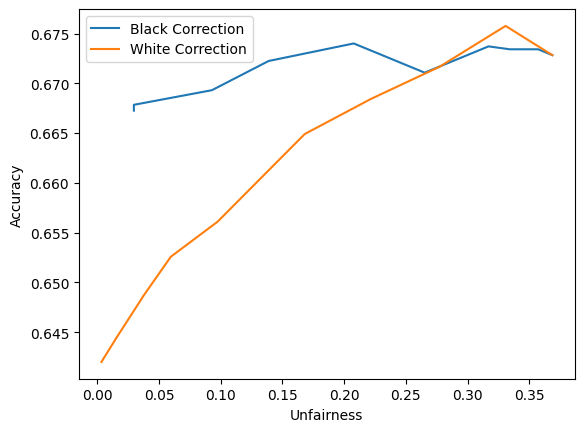

In [55]:
import matplotlib.pyplot as plt
plt.plot(female_unfairness_list, female_accuracy_list, label = "Black Correction")
plt.plot(male_unfairness_list, male_accuracy_list, label = "White Correction")
# plt.plot(unfairness_list, accuracy_list, label = "Union Correction", color='black')
plt.xlabel("Unfairness")
plt.ylabel("Accuracy")
plt.legend()

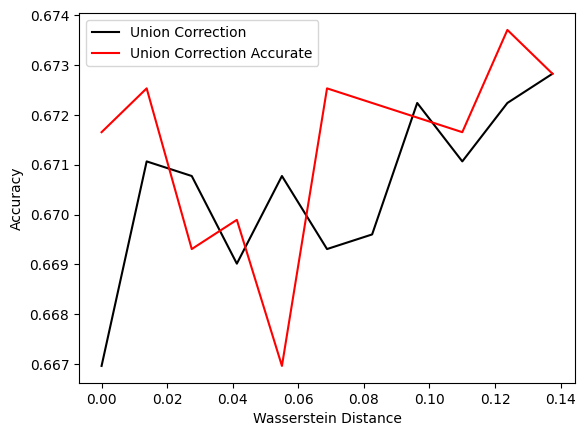

In [41]:
plt.plot(wasserstein_list, accuracy_list, label = "Union Correction", color='black')
plt.plot(wasserstein_list_accurate, accuracy_list_accurate, label = "Union Correction Accurate", color='red')
plt.xlabel("Wasserstein Distance")
plt.ylabel("Accuracy")
plt.legend()

In [42]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
temp = tsne.fit_transform(np.concatenate((X_train_male_proba, fairest_train_female_proba_new)))
X_train_male_proba_2d = temp[0:X_train_male_proba.shape[0]]
X_train_female_proba_temp_2d = temp[-fairest_train_female_proba_new.shape[0]:]

temp = tsne.fit_transform(np.concatenate((X_train_female_proba, fairest_train_male_proba_new)))
X_train_female_proba_2d = temp[0:X_train_female_proba.shape[0]]
X_train_male_proba_temp_2d = temp[-fairest_train_male_proba_new.shape[0]:]

In [57]:
import plotly.express as px

fig = px.scatter(x=X_train_male_proba_2d[:, 0], y=X_train_male_proba_2d[:, 1], color_discrete_sequence=['blue'])
fig2 = px.scatter(x=X_train_female_proba_temp_2d[:, 0], y=X_train_female_proba_temp_2d[:, 1], color_discrete_sequence=['red'])
fig.update_layout(
    title="t-SNE visualization of Corrected Black (Red) Proba + Old White (blue) Proba (POT, train)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig2.update_layout(
    title="t-SNE visualization of Old Black Proba",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.add_trace(fig2.data[0])
fig.show()

In [44]:
import plotly.express as px

fig = px.scatter(x=X_train_male_proba_temp_2d[:, 0], y=X_train_male_proba_temp_2d[:, 1], color_discrete_sequence=['blue'])
fig2 = px.scatter(x=X_train_female_proba_2d[:, 0] + 0.5, y=X_train_female_proba_2d[:, 1], color_discrete_sequence=['red'])
fig.update_layout(
    title="t-SNE visualization of Old Female (Red) Proba + Corrected Male (blue) Proba (POT, shifted female right for visualization)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.add_trace(fig2.data[0])
fig.show()

In [45]:
def K(proba_i, proba_j, sigma):
    return np.exp(-norm(proba_i - proba_j, 2) ** 2 / (2 * sigma**2))


def reduce_bias_test(model, alpha_samples, union=False, accurateMatrix=False):
    alpha_list = (
        [i for i in range(min(11, alpha_samples))]
        if union
        else np.linspace(0, 1, alpha_samples)
    )
    X_train_male_proba = model.predict_proba(X_train_male)
    X_test_male_proba = model.predict_proba(X_test_male)
    X_train_female_proba = model.predict_proba(X_train_female)
    X_test_female_proba = model.predict_proba(X_test_female)

    X_test_male_proba_new = np.zeros(X_test_male_proba.shape)
    X_test_female_proba_new = np.zeros(X_test_female_proba.shape)

    fairest_X_test_male_proba_new = np.zeros(X_test_male_proba.shape)
    fairest_X_test_female_proba_new = np.zeros(X_test_female_proba.shape)

    print(
        "Baseline Accuracy: "
        + str(
            accuracy_score(
                np.concatenate((y_test_female, y_test_male)),
                np.concatenate(
                    (model.predict(X_test_female), model.predict(X_test_male))
                ),
            )
        )
    )

    X_test_male_prediction = model.predict(X_test_male)
    X_test_female_prediction = model.predict(X_test_female)

    X_test_male_distribution = list(
        np.unique(X_test_male_prediction, return_counts=True)
    )[1] / len(X_test_male_prediction)
    X_test_female_distribution = list(
        np.unique(X_test_female_prediction, return_counts=True)
    )[1] / len(X_test_female_prediction)

    test_difference = 0
    for i in range(2):
        test_difference += abs(
            X_test_male_distribution[i] - X_test_female_distribution[i]
        )
    print("Baseline Unfairness: " + str(test_difference))

    alpha = 1
    a = [
        (alpha) / (len(train_male))
        + (1 - alpha) / (len(train_male) + len(train_female))
    ] * len(train_male) + [((1 - alpha) / (len(train_male) + len(train_female)))] * len(
        train_female
    )
    b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(train_male) + [
        (alpha / len(train_female))
        + (1 - alpha) / (len(train_male) + len(train_female))
    ] * len(train_female)
    print("Baseline Wasserstein Distance: " + str(ot.emd2(a, b, matrix_all)))

    male_accuracy_list = []
    male_unfairness_list = []
    female_accuracy_list = []
    female_unfairness_list = []

    accuracy_list = []
    unfairness_list = []
    wasserstein_list = []

    if not union:
        for alpha in alpha_list:
            T = globals()["T"]
            # Correcting Male Test Proba
            i = 0
            for test_proba in X_test_male_proba:
                T_test = np.zeros((len(train_female)))
                ind = 0
                sumK = 0
                for train_proba in X_train_male_proba:
                    T_test += K(test_proba, train_proba, 0.01) * T[ind]
                    sumK += K(test_proba, train_proba, 0.01)
                    ind += 1
                T_test /= sumK
                index = np.random.choice(
                    np.array(np.nonzero(T_test))[0],
                    1,
                    p=T_test[np.nonzero(T_test)] * len(train_male),
                )
                test_male_proba_temp = train_female_proba[index]
                test_male_proba_new = (1 - alpha) * (test_male_proba_temp) + alpha * (
                    test_proba
                )
                X_test_male_proba_new[i, :] = test_male_proba_new

                i += 1
            if alpha == alpha_list[0]:
                fairest_X_test_male_proba_new = X_test_male_proba_new.copy()
            index = 0
            y_pred_male_test = np.empty((len(X_test_male)))
            for proba in X_test_male_proba_new:
                y_pred_male_test[index] = np.argmax(proba)
                index += 1

            X_test_female_prediction = model.predict(X_test_female)

            X_test_male_distribution = list(
                np.resize(
                    (np.unique(y_pred_male_test, return_counts=True))[1]
                    / len(y_pred_male_test),
                    (2),
                )
            )
            X_test_female_distribution = list(
                np.resize(
                    (np.unique(X_test_female_prediction, return_counts=True))[1]
                    / len(X_test_female_prediction),
                    (2),
                )
            )
            test_difference = 0

            for i in range(2):
                test_difference += abs(
                    X_test_male_distribution[i] - X_test_female_distribution[i]
                )
            accuracy = accuracy_score(
                np.concatenate((y_test_female, y_test_male)),
                np.concatenate((model.predict(X_test_female), y_pred_male_test)),
            )
            unfairness = test_difference
            print("Corrected Male, Accuracy: " + str(accuracy))
            print("Corrected Male, Unfairness: " + str(test_difference))
            male_accuracy_list.append(accuracy)
            male_unfairness_list.append(unfairness)

            # Correcting Female Test Proba
            i = 0
            for test_proba in X_test_female_proba:
                T_test = np.zeros((len(train_male)))
                ind = 0
                sumK = 0
                for train_proba in X_train_female_proba:
                    T_test += K(test_proba, train_proba, 0.01) * T.transpose()[ind]
                    sumK += K(test_proba, train_proba, 0.01)
                    ind += 1
                T_test /= sumK
                index = 0
                index = np.random.choice(
                    np.array(np.nonzero(T_test))[0],
                    1,
                    p=T_test[np.nonzero(T_test)] * len(train_female),
                )
                test_female_proba_temp = train_male_proba[index]
                test_female_proba_new = (1 - alpha) * (
                    test_female_proba_temp
                ) + alpha * (test_proba)
                X_test_female_proba_new[i, :] = test_female_proba_new

                i += 1

            if alpha == alpha_list[0]:
                fairest_X_test_female_proba_new = X_test_female_proba_new.copy()
            index = 0
            y_pred_female_test = np.empty((len(X_test_female)))
            for proba in X_test_female_proba_new:
                y_pred_female_test[index] = np.argmax(proba)
                index += 1

            X_test_male_prediction = model.predict(X_test_male)

            X_test_male_distribution = list(
                np.resize(
                    (np.unique(X_test_male_prediction, return_counts=True))[1]
                    / len(X_test_male_prediction),
                    (2),
                )
            )
            X_test_female_distribution = list(
                np.resize(
                    (np.unique(y_pred_female_test, return_counts=True))[1]
                    / len(y_pred_female_test),
                    (2),
                )
            )
            test_difference = 0

            for i in range(2):
                test_difference += abs(
                    X_test_male_distribution[i] - X_test_female_distribution[i]
                )
            accuracy = accuracy_score(
                np.concatenate((y_test_female, y_test_male)),
                np.concatenate((model.predict(X_test_female), y_pred_male_test)),
            )
            unfairness = test_difference
            print("Corrected Female, Accuracy: " + str(accuracy))
            print("Corrected Female, Unfairness: " + str(test_difference))

            female_accuracy_list.append(accuracy)
            female_unfairness_list.append(unfairness)

        return (
            fairest_X_test_male_proba_new,
            fairest_X_test_female_proba_new,
            X_test_male_proba_new,
            X_test_female_proba_new,
            male_accuracy_list,
            male_unfairness_list,
            female_accuracy_list,
            female_unfairness_list,
        )
    else:
        for alpha in alpha_list:

            # Correcting Male Test Proba
            if accurateMatrix:
                T = T_male_to_all_accurate[alpha]
            else:
                print("in")
                T = T_male_to_all[alpha]

            i = 0
            for test_proba in X_test_male_proba:
                T_test = np.zeros((len(train_female) + len(train_male)))
                ind = 0
                sumK = 0
                for train_proba in X_train_male_proba:
                    T_test += K(test_proba, train_proba, 0.01) * T[ind]
                    sumK += K(test_proba, train_proba, 0.01)
                    ind += 1
                T_test /= sumK
                index = np.random.choice(
                    np.array(np.nonzero(T_test))[0],
                    1,
                    p=T_test[np.nonzero(T_test)] * len(train_male),
                )
                if index < len(train_female):
                    X_test_male_proba_new[i, :] = train_female_proba[index]
                else:
                    index -= len(train_female)
                    X_test_male_proba_new[i, :] = train_male_proba[index]

                i += 1
            index = 0
            y_pred_male_test = np.empty((len(X_test_male)))
            for proba in X_test_male_proba_new:
                y_pred_male_test[index] = np.argmax(proba)
                index += 1

            # Correcting Female Test Proba
            if accurateMatrix:
                T = T_female_to_all_accurate[alpha]
            else:
                T = T_female_to_all[alpha]
            i = 0
            for test_proba in X_test_female_proba:
                T_test = np.zeros((len(train_male) + len(train_female)))
                ind = 0
                sumK = 0
                for train_proba in X_train_female_proba:
                    T_test += K(test_proba, train_proba, 0.01) * T[ind]
                    sumK += K(test_proba, train_proba, 0.01)
                    ind += 1
                T_test /= sumK
                index = 0
                index = np.random.choice(
                    np.array(np.nonzero(T_test))[0],
                    1,
                    p=T_test[np.nonzero(T_test)] * len(train_female),
                )
                if index < len(train_male):
                    X_test_female_proba_new[i, :] = train_male_proba[index]
                else:
                    index -= len(train_male)
                    X_test_female_proba_new[i, :] = train_female_proba[index]

                i += 1

            index = 0
            y_pred_female_test = np.empty((len(X_test_female)))
            for proba in X_test_female_proba_new:
                y_pred_female_test[index] = np.argmax(proba)
                index += 1

            X_test_male_distribution = list(
                np.resize(
                    (np.unique(y_pred_male_test, return_counts=True))[1]
                    / len(y_pred_male_test),
                    (2),
                )
            )
            X_test_female_distribution = list(
                np.resize(
                    (np.unique(y_pred_female_test, return_counts=True))[1]
                    / len(y_pred_female_test),
                    (2),
                )
            )

            test_difference = 0
            for i in range(2):
                test_difference += abs(
                    X_test_male_distribution[i] - X_test_female_distribution[i]
                )

            alpha = alpha / 10
            a = [
                (alpha) / (len(train_male))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(train_male) + [
                ((1 - alpha) / (len(train_male) + len(train_female)))
            ] * len(
                train_female
            )
            b = [(1 - alpha) / (len(train_male) + len(train_female))] * len(
                train_male
            ) + [
                (alpha / len(train_female))
                + (1 - alpha) / (len(train_male) + len(train_female))
            ] * len(
                train_female
            )

            wasserstein_distance = ot.emd2(a, b, matrix_all)
            accuracy = accuracy_score(
                np.concatenate((y_test_female, y_test_male)),
                np.concatenate((y_pred_female_test, y_pred_male_test)),
            )
            unfairness = test_difference
            print("Corrected Accuracy: " + str(accuracy))
            print("Corrected Unfairness: " + str(test_difference))
            print("Corrected Wasserstein Distance: " + str(wasserstein_distance))

            accuracy_list.append(accuracy)
            unfairness_list.append(unfairness)
            wasserstein_list.append(wasserstein_distance)

        return accuracy_list, unfairness_list, wasserstein_list


In [46]:
fairest_X_test_male_proba_new, fairest_X_test_female_proba_new, X_test_male_proba_new, X_test_female_proba_new, test_male_accuracy_list, test_male_unfairness_list, test_female_accuracy_list, test_female_unfairness_list = reduce_bias_test(logreg, 10)

Baseline Accuracy: 0.67018779342723
Baseline Unfairness: 0.533797345886702
Baseline Wasserstein Distance: 0.13750624551259816
Corrected Male, Accuracy: 0.6396713615023474
Corrected Male, Unfairness: 0.13957921185253633
Corrected Female, Accuracy: 0.6396713615023474
Corrected Female, Unfairness: 0.1821489942383504
Corrected Male, Accuracy: 0.6408450704225352
Corrected Male, Unfairness: 0.18425726704307513
Corrected Female, Accuracy: 0.6408450704225352
Corrected Female, Unfairness: 0.24808306017241633
Corrected Male, Accuracy: 0.6384976525821596
Corrected Male, Unfairness: 0.16848854168170854
Corrected Female, Accuracy: 0.6384976525821596
Corrected Female, Unfairness: 0.3359951480845042
Corrected Male, Accuracy: 0.6373239436619719
Corrected Male, Unfairness: 0.21316659687224734
Corrected Female, Accuracy: 0.6373239436619719
Corrected Female, Unfairness: 0.35797317006252627
Corrected Male, Accuracy: 0.6338028169014085
Corrected Male, Unfairness: 0.2368196849142972
Corrected Female, Accura

In [47]:
accuracy_list, unfairness_list, wasserstein_list = reduce_bias_test(logreg, 11, True)

Baseline Accuracy: 0.67018779342723
Baseline Unfairness: 0.533797345886702
Baseline Wasserstein Distance: 0.13750624551259816
in
Corrected Accuracy: 0.6607981220657277
Corrected Unfairness: 0.07511804883683992
Corrected Wasserstein Distance: 0.0
in
Corrected Accuracy: 0.6596244131455399
Corrected Unfairness: 0.20961430159853284
Corrected Wasserstein Distance: 0.013750624551259699
in
Corrected Accuracy: 0.6654929577464789
Corrected Unfairness: 0.21749866427921621
Corrected Wasserstein Distance: 0.027501249102519557
in
Corrected Accuracy: 0.6549295774647887
Corrected Unfairness: 0.2992014555746487
Corrected Wasserstein Distance: 0.04125187365377936
in
Corrected Accuracy: 0.653755868544601
Corrected Unfairness: 0.22442997213036636
Corrected Wasserstein Distance: 0.05500249820503912
in
Corrected Accuracy: 0.6596244131455399
Corrected Unfairness: 0.3641824666791815
Corrected Wasserstein Distance: 0.06875312275629913
in
Corrected Accuracy: 0.6631455399061033
Corrected Unfairness: 0.419604049

C:\Users\anush\AppData\Local\Programs\Python\Python39\lib\site-packages\ot\lp\__init__.py:571: UserWarning:

numItermax reached before optimality. Try to increase numItermax.



Corrected Accuracy: 0.6654929577464789
Corrected Unfairness: 0.49867871944087455
Corrected Wasserstein Distance: 0.12375562096133855
in
Corrected Accuracy: 0.67018779342723
Corrected Unfairness: 0.5285411040995798
Corrected Wasserstein Distance: 0.13750624551259816


In [48]:
accuracy_list_accurate, unfairness_list_accurate, wasserstein_list_accurate = reduce_bias_test(logreg, 11, True, True)

Baseline Accuracy: 0.67018779342723
Baseline Unfairness: 0.533797345886702
Baseline Wasserstein Distance: 0.13750624551259816
Corrected Accuracy: 0.6561032863849765
Corrected Unfairness: 0.061024389539501234
Corrected Wasserstein Distance: 0.0
Corrected Accuracy: 0.6561032863849765
Corrected Unfairness: 0.2332673896405828
Corrected Wasserstein Distance: 0.013750624551259699
Corrected Accuracy: 0.6525821596244131
Corrected Unfairness: 0.147983422622056
Corrected Wasserstein Distance: 0.027501249102519557
Corrected Accuracy: 0.6654929577464789
Corrected Unfairness: 0.238523631427705
Corrected Wasserstein Distance: 0.04125187365377936
Corrected Accuracy: 0.6654929577464789
Corrected Unfairness: 0.3211794775526708
Corrected Wasserstein Distance: 0.05500249820503912
Corrected Accuracy: 0.6584507042253521
Corrected Unfairness: 0.38090424687008123
Corrected Wasserstein Distance: 0.06875312275629913
Corrected Accuracy: 0.6619718309859155
Corrected Unfairness: 0.39762602706098116
Corrected Wass

C:\Users\anush\AppData\Local\Programs\Python\Python39\lib\site-packages\ot\lp\__init__.py:571: UserWarning:

numItermax reached before optimality. Try to increase numItermax.



Corrected Accuracy: 0.6678403755868545
Corrected Unfairness: 0.4740725765692914
Corrected Wasserstein Distance: 0.12375562096133855
Corrected Accuracy: 0.6666666666666666
Corrected Unfairness: 0.5259129832060186
Corrected Wasserstein Distance: 0.13750624551259816


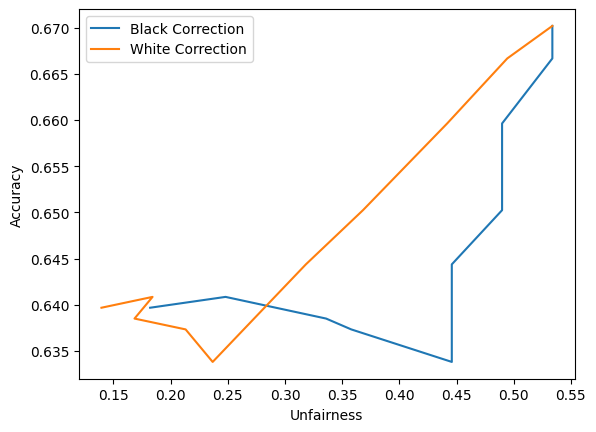

In [56]:
plt.plot(test_female_unfairness_list, test_female_accuracy_list, label = 'Black Correction')
plt.plot(test_male_unfairness_list, test_male_accuracy_list, label = 'White Correction')
# plt.plot(unfairness_list, accuracy_list, label = 'Union Correction', color = 'black')
# plt.plot(unfairness_list_accurate, accuracy_list_accurate, label = 'Union Correction Accurate', color = 'red')
plt.xlabel("Unfairness")
plt.ylabel("Accuracy")
plt.legend()

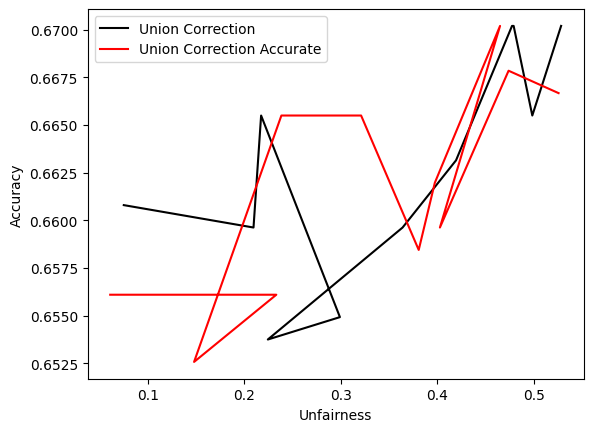

In [50]:
plt.plot(unfairness_list, accuracy_list, label = 'Union Correction', color = 'black')
plt.plot(unfairness_list_accurate, accuracy_list_accurate, label = 'Union Correction Accurate', color = 'red')
plt.xlabel("Unfairness")
plt.ylabel("Accuracy")
plt.legend()

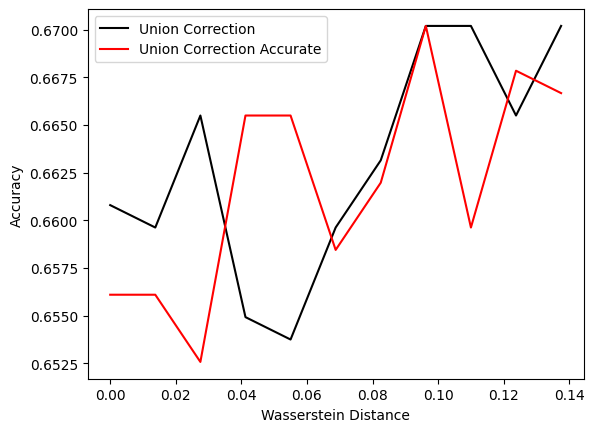

In [51]:
plt.plot(wasserstein_list, accuracy_list, label = 'Union Correction', color = 'black')
plt.plot(wasserstein_list_accurate, accuracy_list_accurate, label = 'Union Correction Accurate', color = 'red')
plt.xlabel("Wasserstein Distance")
plt.ylabel("Accuracy")
plt.legend()

In [52]:
temp = tsne.fit_transform(np.concatenate((X_test_male_proba, fairest_X_test_female_proba_new)))
X_test_male_proba_2d = temp[0:X_test_male_proba.shape[0]]
X_test_female_proba_temp_2d = temp[-fairest_X_test_female_proba_new.shape[0]:]

temp = tsne.fit_transform(np.concatenate((X_test_female_proba, fairest_X_test_male_proba_new)))
X_test_female_proba_2d = temp[0:X_test_female_proba.shape[0]]
X_test_male_proba_temp_2d = temp[-fairest_X_test_male_proba_new.shape[0]:]

X_test_male_proba_2d

array([[-2.4894030e+00, -4.3294922e-04],
       [ 7.3760753e+00, -4.8426277e-04],
       [ 1.7638540e+01, -2.4658874e-08],
       ...,
       [-2.3897200e+00, -4.1387422e-04],
       [-5.7663736e+00, -1.1256929e-04],
       [ 1.2491419e+01,  1.6035217e-06]], dtype=float32)

In [58]:
import plotly.express as px

fig = px.scatter(x=X_test_male_proba_2d[:, 0], y=X_test_male_proba_2d[:, 1], color_discrete_sequence=['blue'])
fig2 = px.scatter(x=X_test_female_proba_temp_2d[:, 0], y=X_test_female_proba_temp_2d[:, 1], color_discrete_sequence=['red'])
fig.update_layout(
    title="t-SNE visualization of Corrected Black (Red) Proba + Old White (blue) Proba (POT, test)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.add_trace(fig2.data[0])
fig.show()

In [59]:
X_train_male_proba[0]

array([0.58437679, 0.41562321])

In [54]:
fig = px.scatter(x=X_test_male_proba_temp_2d[:, 0], y=X_test_male_proba_temp_2d[:, 1], color_discrete_sequence=['blue'])
fig2 = px.scatter(x=X_test_female_proba_2d[:, 0], y=X_test_female_proba_2d[:, 1], color_discrete_sequence=['red'])
fig.update_layout(
    title="t-SNE visualization of Old Black (Red) Proba + Corrected White (blue) Proba (POT, test)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.add_trace(fig2.data[0])
fig.show()